In [0]:
import os
import os.path
from os import path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import csv
from PIL import Image
from numpy import array
from skimage import data
from skimage.feature import greycomatrix, greycoprops
from skimage.feature import local_binary_pattern
from skimage.transform import integral_image
from skimage.feature import haar_like_feature
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
loc1 = '/home/aman/Desktop/explo/breast/benign/'
loc2 = '/home/aman/Desktop/explo/breast/malignant/'
loc3 = '/home/aman/Desktop/explo/breast/b_processed/'
loc4 = '/home/aman/Desktop/explo/breast/m_processed/'
loc5 = '/home/aman/Desktop/explo/breast/features.csv'
loc6 = '/home/aman/Desktop/explo/breast/b_imf2'
loc7 = '/home/aman/Desktop/explo/breast/m_imf2'
loc0 = '/home/aman/Desktop/explo/breast/features2.csv'

In [0]:
N_=32


def loadImages1(loc):
    image_files = glob.glob(loc + '/a*.png', recursive=True)
    #print(type(image_files))
    return image_files
def loadImages2(loc):
    image_files = glob.glob(loc + '/b*.png', recursive=True)
    #print(type(image_files))
    return image_files
def loadImages3(loc):
    image_files = glob.glob(loc + '/c*.png', recursive=True)
    #print(type(image_files))
    return image_files
def loadImages4(loc):
    image_files = glob.glob(loc + '/**/d*.png', recursive=True)
    #print(type(image_files))
    return image_files


def processing(data,i,j):
    #img = [cv2.imread(data, cv2.IMREAD_UNCHANGED) for i in data[:3]]
    img = cv2.imread(data, cv2.IMREAD_UNCHANGED)

    height = 220
    width = 220
    dim = (width, height)
    
    res = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
    res_img = res

    blur = cv2.GaussianBlur(res_img, (5, 5), 0)
    image = blur
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    
#     display(img,thresh,'original','preprocessed')
    if i==0:
        cv2.imwrite(os.path.join(loc3 , 'b{}.png'.format(j)), thresh)
        
    if i==1:
        cv2.imwrite(os.path.join(loc4 , 'm{}.png'.format(j)), thresh)
        



        
def get1d(x,c):
    x = cv2.resize(x, (N_,N_), interpolation=cv2.INTER_LINEAR)
    ans=[]
    for i in range(0,N_):
        for j in range(0,N_):
            ans.append(x[i][j])
    ans.append(c)
    return ans
    

def main():
    global loc0
    global loc1
    global loc2
    global loc3
    global loc4
    global loc5
    global loc6
    global loc8
    global N_
    a=loadImages1(loc6)
    a.sort()
    b=loadImages2(loc6)
    b.sort()
    c=loadImages3(loc6)
    c.sort()
    feture=[]
    z=[]
    for i in range(0,N_*N_):
        z.append(i)
    z.append('diagnosis')
    feture.append(z)
    for i in range(0,len(b)):
        var1=(mean, std) = cv2.meanStdDev(cv2.imread(a[i]))
        var2=(mean, std) = cv2.meanStdDev(cv2.imread(b[i]))
        var3=(mean, std) = cv2.meanStdDev(cv2.imread(c[i]))
        ans=max(var1[0][0],var2[0][0],var3[0][0])
        if(ans is var1[0][0]):
            feature.append(get1d(cv2.imread(a[i],0),'b'))
        elif(ans is var2[0][0]):
            feture.append(get1d(cv2.imread(b[i],0),'b'))
        else:
            feture.append(get1d(cv2.imread(c[i],0),'b'))
    a=loadImages1(loc7)
    a.sort()
    b=loadImages2(loc7)
    b.sort()
    c=loadImages3(loc7)
    c.sort()
    for i in range(0,len(c)):
        feture.append(get1d(cv2.imread(c[i],0),'m'))
        var1=(mean, std) = cv2.meanStdDev(cv2.imread(a[i]))
        var2=(mean, std) = cv2.meanStdDev(cv2.imread(b[i]))
        var3=(mean, std) = cv2.meanStdDev(cv2.imread(c[i]))
        ans=max(var1[0][0],var2[0][0],var3[0][0])
        if(ans is var1[0][0]):
            feature.append(get1d(cv2.imread(a[i],0),'m'))
        elif(ans is var2[0][0]):
            feture.append(get1d(cv2.imread(b[i],0),'m'))
        else:
            feture.append(get1d(cv2.imread(c[i],0),'m'))
    
    with open(loc5, 'w') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerows(feture)

    csvFile.close()
        

           
main()    

In [0]:
df = pd.read_csv(loc5)
ds = df.sample(frac=1)
ds.to_csv(loc0,index=False)

df = pd.read_csv(loc0, delimiter = ',')   
y = df.diagnosis
X = df.drop('diagnosis', axis=1)

AUC: 0.500


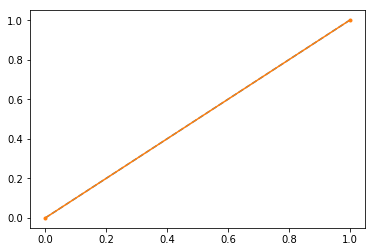

Accuracy: 0.6934865900383141
[[  0 320]
 [  0 724]]
              precision    recall  f1-score   support

           b       0.00      0.00      0.00       320
           m       0.69      1.00      0.82       724

   micro avg       0.69      0.69      0.69      1044
   macro avg       0.35      0.50      0.41      1044
weighted avg       0.48      0.69      0.57      1044

Accuracy: 0.7025862068965517




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


AUC: 0.500


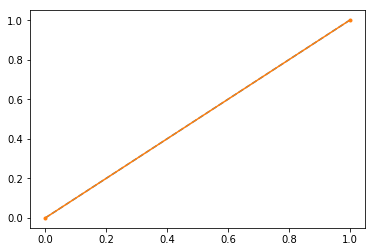

Accuracy: 0.6934865900383141
[[  0 320]
 [  0 724]]
              precision    recall  f1-score   support

           b       0.00      0.00      0.00       320
           m       0.69      1.00      0.82       724

   micro avg       0.69      0.69      0.69      1044
   macro avg       0.35      0.50      0.41      1044
weighted avg       0.48      0.69      0.57      1044

Accuracy: 0.7025862068965517




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


AUC: 0.500


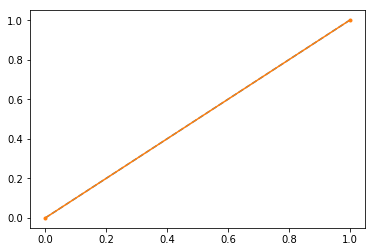

Accuracy: 0.6934865900383141
[[  0 320]
 [  0 724]]
              precision    recall  f1-score   support

           b       0.00      0.00      0.00       320
           m       0.69      1.00      0.82       724

   micro avg       0.69      0.69      0.69      1044
   macro avg       0.35      0.50      0.41      1044
weighted avg       0.48      0.69      0.57      1044

Accuracy: 0.7025862068965517




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


AUC: 0.588


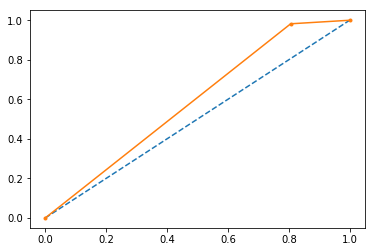

Accuracy: 0.7404214559386973
[[ 62 258]
 [ 13 711]]
              precision    recall  f1-score   support

           b       0.83      0.19      0.31       320
           m       0.73      0.98      0.84       724

   micro avg       0.74      0.74      0.74      1044
   macro avg       0.78      0.59      0.58      1044
weighted avg       0.76      0.74      0.68      1044

Accuracy: 0.7308429118773946


AUC: 0.575


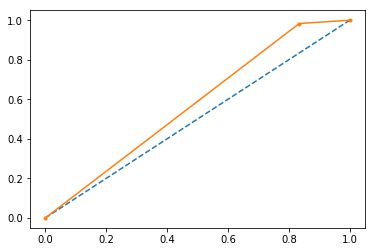

Accuracy: 0.7327586206896551
[[ 53 267]
 [ 12 712]]
              precision    recall  f1-score   support

           b       0.82      0.17      0.28       320
           m       0.73      0.98      0.84       724

   micro avg       0.73      0.73      0.73      1044
   macro avg       0.77      0.57      0.56      1044
weighted avg       0.75      0.73      0.66      1044

Accuracy: 0.7318007662835249


AUC: 0.575


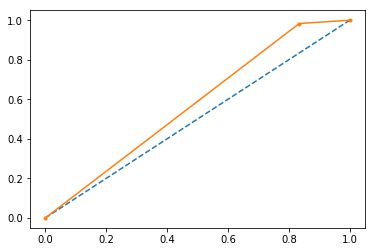

Accuracy: 0.7327586206896551
[[ 53 267]
 [ 12 712]]
              precision    recall  f1-score   support

           b       0.82      0.17      0.28       320
           m       0.73      0.98      0.84       724

   micro avg       0.73      0.73      0.73      1044
   macro avg       0.77      0.57      0.56      1044
weighted avg       0.75      0.73      0.66      1044

Accuracy: 0.7318007662835249


AUC: 0.666


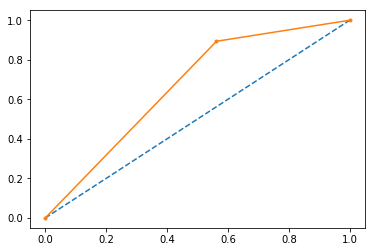

Accuracy: 0.7538314176245211
[[140 180]
 [ 77 647]]
              precision    recall  f1-score   support

           b       0.65      0.44      0.52       320
           m       0.78      0.89      0.83       724

   micro avg       0.75      0.75      0.75      1044
   macro avg       0.71      0.67      0.68      1044
weighted avg       0.74      0.75      0.74      1044

Accuracy: 0.7650862068965517


AUC: 0.688


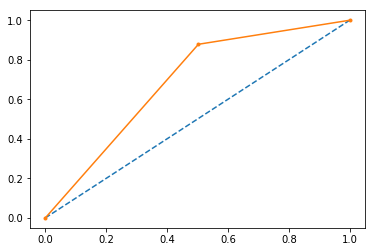

Accuracy: 0.7614942528735632
[[159 161]
 [ 88 636]]
              precision    recall  f1-score   support

           b       0.64      0.50      0.56       320
           m       0.80      0.88      0.84       724

   micro avg       0.76      0.76      0.76      1044
   macro avg       0.72      0.69      0.70      1044
weighted avg       0.75      0.76      0.75      1044

Accuracy: 0.7739463601532567


AUC: 0.671


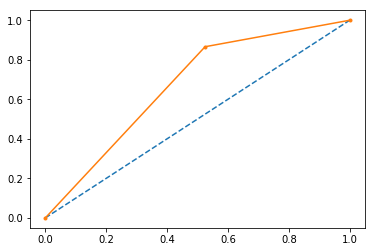

Accuracy: 0.7461685823754789
[[152 168]
 [ 97 627]]
              precision    recall  f1-score   support

           b       0.61      0.47      0.53       320
           m       0.79      0.87      0.83       724

   micro avg       0.75      0.75      0.75      1044
   macro avg       0.70      0.67      0.68      1044
weighted avg       0.73      0.75      0.74      1044

Accuracy: 0.7698754789272031


AUC: 0.671


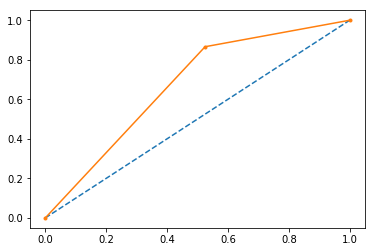

Accuracy: 0.7461685823754789
[[152 168]
 [ 97 627]]
              precision    recall  f1-score   support

           b       0.61      0.47      0.53       320
           m       0.79      0.87      0.83       724

   micro avg       0.75      0.75      0.75      1044
   macro avg       0.70      0.67      0.68      1044
weighted avg       0.73      0.75      0.74      1044

Accuracy: 0.7698754789272031


[69.34865900383141, 69.34865900383141, 69.34865900383141, 74.04214559386973, 73.27586206896551, 73.27586206896551, 75.38314176245211, 76.14942528735632, 74.61685823754789, 74.61685823754789]


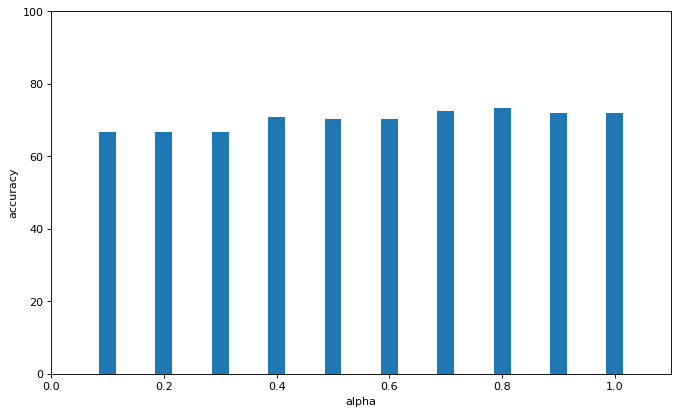

In [0]:
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn import datasets
    # Import train_test_split function
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix 
    from sklearn.metrics import accuracy_score 
    from sklearn.metrics import classification_report 
    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics
    ac1=[]
    ac2=[]
    i=1
    while(i<=10):
        df = pd.read_csv(loc5, delimiter = ',')
        y = df.diagnosis
        X = df.drop('diagnosis', axis=1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
        abc = AdaBoostClassifier(n_estimators=5, learning_rate=i/10)
        model = abc.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        roc_auc(y_test, y_pred)
            
        print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
        results = confusion_matrix(y_test, y_pred)
        print(results) 
        print (classification_report(y_test, y_pred))
        ac1.append(metrics.accuracy_score(y_test, y_pred))
        y_pred = model.predict(X_train)
        print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
        ac2.append( (accuracy_score(y_train, y_pred)*0.2+ac1[-1])*0.8)
        print("\n")
        i=i+1
    ac_compare(ac1,ac2)

    

Learning_rate =  0.1  Accuracy: 70.88%
Learning_rate =  0.1  Accuracy: 69.88%
[[   0 1258]
 [   0 2918]]
Learning_rate =  0.2  Accuracy: 71.74%
Learning_rate =  0.2  Accuracy: 71.07%
[[  51 1207]
 [   1 2917]]
Learning_rate =  0.3  Accuracy: 75.96%
Learning_rate =  0.3  Accuracy: 76.89%
[[ 330  928]
 [  37 2881]]
Learning_rate =  0.4  Accuracy: 78.64%
Learning_rate =  0.4  Accuracy: 79.81%
[[ 490  768]
 [  75 2843]]
Learning_rate =  0.5  Accuracy: 78.35%
Learning_rate =  0.5  Accuracy: 81.30%
[[ 604  654]
 [ 127 2791]]
              precision    recall  f1-score   support

class Benign       0.83      0.48      0.61      1258
class malign       0.81      0.96      0.88      2918

   micro avg       0.81      0.81      0.81      4176
   macro avg       0.82      0.72      0.74      4176
weighted avg       0.82      0.81      0.80      4176





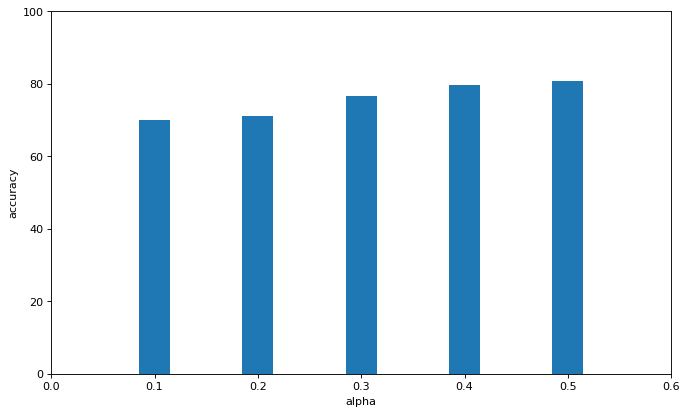

In [0]:
    import sklearn
    lis1=[]
    lis2=[]

    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix 
    from sklearn.metrics import accuracy_score 
    from sklearn.metrics import classification_report
    
    #for
    #gradientboosting
    
    test_size = 0.2
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    learning_rate=[i/10 for i in range(1,6)]
    for alpha in learning_rate:
        
        model = sklearn.ensemble.GradientBoostingClassifier(learning_rate = alpha,n_estimators=5,max_depth=2,min_samples_split=3)
        model = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        predictions = [value for value in y_pred]
        
        accuracy = accuracy_score(y_test, predictions)
        print("Learning_rate = ",alpha," Accuracy: %.2f%%" % (accuracy * 100.0))

        
        
        lis1.append(accuracy*100)
        
        y_pred = model.predict(X_train)
        predictions = [value for value in y_pred]
        
#         print("Accuracy:",metrics.accuracy_score(y_train, predictions))
        
        train_mod = [value for value in y_train]
        
        accuracy = accuracy_score(y_train, predictions)
        print("Learning_rate = ",alpha," Accuracy: %.2f%%" % (accuracy * 100.0))
        
        lis2.append( (accuracy*80+lis1[-1]*.2))
        
        results = confusion_matrix(y_train,predictions)
        print(results)
        
        #target_names = ['class Benign', 'class malign']
        #rpt = classification_report(y_train, predictions, target_names=target_names)
        #print(rpt)
        #print("\n")
        

    
    #results = confusion_matrix(y_train,predictions)
    #print(results)
    
    
    target_names = ['class Benign', 'class malign']
    rpt = classification_report(y_train, predictions, target_names=target_names)
    print(rpt)
    print("\n")

    
    exp_y=[]
    for j in range(len(train_mod)):
        if train_mod[j] == 'B':
            exp_y.append(0)
        else:
            exp_y.append(1)
        
    pred_y=[]
    for j in range(len(predictions)):
        if predictions[j] == 'B':
            pred_y.append(0)
        else :
            pred_y.append(1)
            
            
    
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import figure
    figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    x = [0.1, 0.2, 0.3 , 0.4, 0.5]

    # plt.plot(x, ac, 'ro')
    ac1=lis1
    ac2=lis2
    #print(ac1)
#     plt.bar(x, ac1, width=0.05, bottom=None)
#     x=[i+0.01 for i in x]
    plt.bar(x, ac2, width=0.03, bottom=None)

    plt.axis([0, 0.6, 0, 100])
    plt.xlabel('alpha')
    plt.ylabel('accuracy')
    plt.show()

heel
              precision    recall  f1-score   support

           b       0.92      0.52      0.66       537
           m       0.82      0.98      0.89      1186

   micro avg       0.84      0.84      0.84      1723
   macro avg       0.87      0.75      0.78      1723
weighted avg       0.85      0.84      0.82      1723

[[ 277  260]
 [  23 1163]]
AUC: 0.748


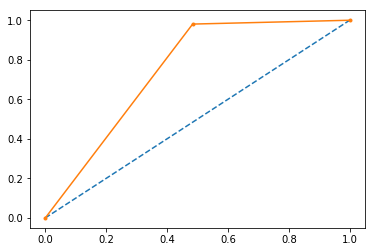

Learning_rate =  0.1  Accuracy: 83.58%
              precision    recall  f1-score   support

           b       0.91      0.57      0.70       537
           m       0.83      0.97      0.90      1186

   micro avg       0.85      0.85      0.85      1723
   macro avg       0.87      0.77      0.80      1723
weighted avg       0.86      0.85      0.84      1723

[[ 304  233]
 [  31 1155]]
AUC: 0.770


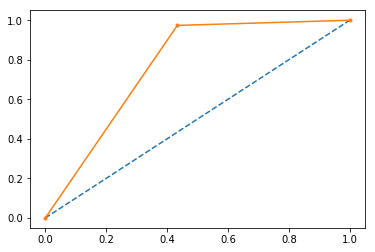

Learning_rate =  0.2  Accuracy: 84.68%
              precision    recall  f1-score   support

           b       0.85      0.58      0.69       537
           m       0.84      0.95      0.89      1186

   micro avg       0.84      0.84      0.84      1723
   macro avg       0.84      0.77      0.79      1723
weighted avg       0.84      0.84      0.83      1723

[[ 314  223]
 [  54 1132]]
AUC: 0.770


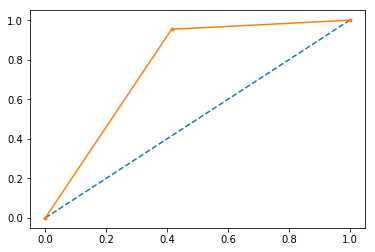

Learning_rate =  0.3  Accuracy: 83.92%
              precision    recall  f1-score   support

           b       0.81      0.64      0.72       537
           m       0.85      0.93      0.89      1186

   micro avg       0.84      0.84      0.84      1723
   macro avg       0.83      0.79      0.80      1723
weighted avg       0.84      0.84      0.84      1723

[[ 346  191]
 [  81 1105]]
AUC: 0.788


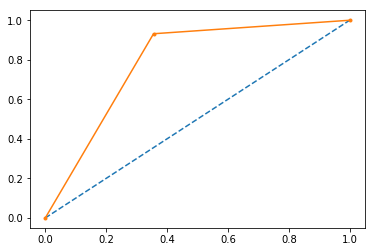

Learning_rate =  0.4  Accuracy: 84.21%
              precision    recall  f1-score   support

           b       0.83      0.65      0.73       537
           m       0.86      0.94      0.90      1186

   micro avg       0.85      0.85      0.85      1723
   macro avg       0.84      0.80      0.81      1723
weighted avg       0.85      0.85      0.84      1723

[[ 349  188]
 [  70 1116]]
AUC: 0.795


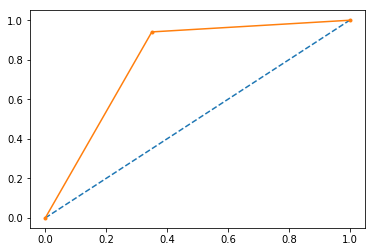

Learning_rate =  0.5  Accuracy: 85.03%
              precision    recall  f1-score   support

           b       0.81      0.64      0.72       537
           m       0.85      0.93      0.89      1186

   micro avg       0.84      0.84      0.84      1723
   macro avg       0.83      0.79      0.80      1723
weighted avg       0.84      0.84      0.84      1723

[[ 344  193]
 [  80 1106]]
AUC: 0.787


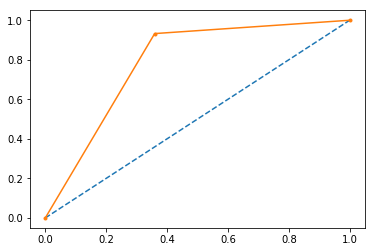

Learning_rate =  0.6  Accuracy: 84.16%
              precision    recall  f1-score   support

           b       0.79      0.65      0.71       537
           m       0.85      0.92      0.89      1186

   micro avg       0.84      0.84      0.84      1723
   macro avg       0.82      0.78      0.80      1723
weighted avg       0.83      0.84      0.83      1723

[[ 347  190]
 [  92 1094]]
AUC: 0.784


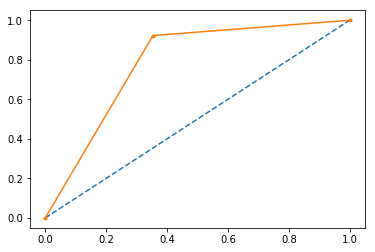

Learning_rate =  0.7  Accuracy: 83.63%
              precision    recall  f1-score   support

           b       0.78      0.67      0.72       537
           m       0.86      0.92      0.89      1186

   micro avg       0.84      0.84      0.84      1723
   macro avg       0.82      0.79      0.80      1723
weighted avg       0.84      0.84      0.83      1723

[[ 358  179]
 [  99 1087]]
AUC: 0.792


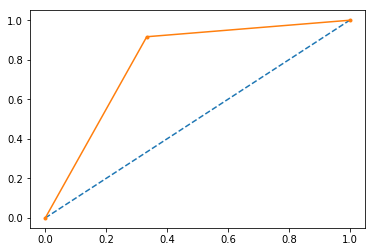

Learning_rate =  0.8  Accuracy: 83.87%
              precision    recall  f1-score   support

           b       0.77      0.68      0.72       537
           m       0.86      0.91      0.89      1186

   micro avg       0.84      0.84      0.84      1723
   macro avg       0.82      0.79      0.80      1723
weighted avg       0.83      0.84      0.83      1723

[[ 364  173]
 [ 106 1080]]
AUC: 0.794


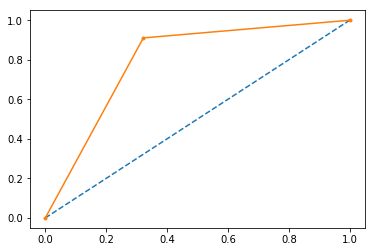

Learning_rate =  0.9  Accuracy: 83.81%
              precision    recall  f1-score   support

           b       0.77      0.70      0.73       537
           m       0.87      0.91      0.89      1186

   micro avg       0.84      0.84      0.84      1723
   macro avg       0.82      0.80      0.81      1723
weighted avg       0.84      0.84      0.84      1723

[[ 376  161]
 [ 112 1074]]
AUC: 0.803


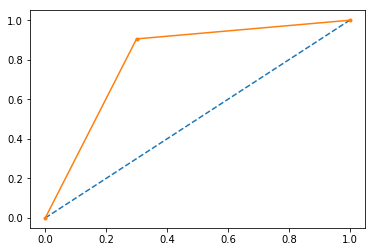

Learning_rate =  1.0  Accuracy: 84.16%
[83.57515960533952, 84.67788740568776, 83.92338943702843, 84.21358096343586, 85.02611723737667, 84.15554265815437, 83.633197910621, 83.86535113174696, 83.80731282646546, 84.15554265815437]


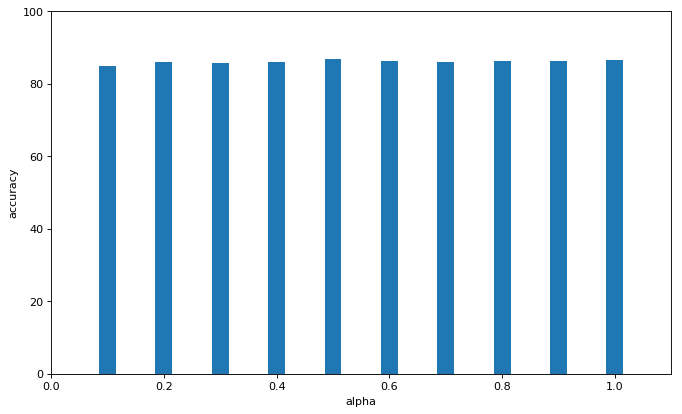

In [0]:
from xgboost import plot_tree
print("heel")
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# fit model no training data
ac1=[]
ac2=[]
learning_rate=[i/10 for i in range(1,11)]
for alpha in learning_rate:
    model = XGBClassifier(
    learning_rate =alpha,
    n_estimators=5,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,seed=7)
    model.fit(X_train, y_train)
    

    
    
    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [value for value in y_pred]
    rpt = classification_report(y_test, predictions)
    print(rpt)
    results = confusion_matrix(y_test, y_pred)
    print(results) 
    roc_auc(y_test, y_pred)
        
    predictions = [value for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    ac1.append(accuracy)
    print("Learning_rate = ",alpha," Accuracy: %.2f%%" % (accuracy * 100.0))
    y_pred = model.predict(X_train)
    ac2.append( (accuracy_score(y_train, y_pred)*0.2+ac1[-1]*0.8))
#     plot_tree(model, num_trees=0,)
#     plt.show()
ac_compare(ac1,ac2)

In [0]:
# ac1 test accauracy [0,1]
# ac2 train accuracy [0,1]
def ac_compare(ac1,ac2):
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import figure
    figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    x = [0.1, 0.2, 0.3 , 0.4, 0.5, 0.6, 0.7,0.8, 0.9, 1]

    # plt.plot(x, ac, 'ro')
    ac1=[x*100 for x in ac1]
    ac2=[x*100 for x in ac2]
    print(ac1)
#     plt.bar(x, ac1, width=0.05, bottom=None)
#     x=[i+0.01 for i in x]
    plt.bar(x, ac2, width=0.03, bottom=None)

    plt.axis([0, 1.1, 0, 100])
    plt.xlabel('alpha')
    plt.ylabel('accuracy')
    plt.show()


In [0]:
def roc_auc(expected_y,predicted_y):
    exp_y=[]
    for j in expected_y:
        if j == 'b':
            exp_y.append(0)
        else:
            exp_y.append(1)
        
    pred_y=[]
    for j in predicted_y:
        if j == 'b':
            pred_y.append(0)
        else :
            pred_y.append(1)
    auc = roc_auc_score(exp_y, pred_y)
    print('AUC: %.3f' % auc)
    
    fpr, tpr, thresholds = roc_curve(exp_y, pred_y)
    
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.show()
